# 🫀 HEART DISEASE PROJECT

**These are the steps that would be taken to complete or solve this problem:**

## Problem Definition
Based on the attributes/parameters given, I will investigate if a patient is having heart disease or not.

## Data

The original data came from the [Cleveland database from UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+disease)

Howevever, I downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/datasets/abhishek14398/heart-disease-classification).

## Evaluation
If I can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, I will pursure this project.

## Features
**Data Set Information:**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date.


**Attribute Information:**

Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

**Attribute documentation:**

3 age: age in years

4 sex: sex (1 = male; 0 = female)

9 cp: chest pain type
* Value 1: typical angina
* Value 2: atypical angina
*  Value 3: non-anginal pain
* Value 4: asymptomatic

10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)

12 chol: serum cholestoral in mg/dl

16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

19 restecg: resting electrocardiographic results
* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

32 thalach: maximum heart rate achieved

38 exang: exercise induced angina (1 = yes; 0 = no)

40 oldpeak = ST depression induced by exercise relative to rest

41 slope: the slope of the peak exercise ST segment
* Value 1: upsloping
* Value 2: flat
* Value 3: downsloping

44 ca: number of major vessels (0-3) colored by flourosopy

51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


58 num: diagnosis of heart disease (angiographic disease status)
* Value 0: < 50% diameter narrowing
*  Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)

**To get the complete attribute documentation:** [Use this link ](https://archive.ics.uci.edu/ml/datasets/heart+disease)


## Modeling
I will be testing various classification modeling tools or estimators in the scikit learn documentation

<hr>

In [1]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Models
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

# Evaluation 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# import daa
df = pd.read_csv('./data/heart.csv')
df

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Performing Exploratory Data Analyis (EDA) on the data to become a subject matter expert

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# getting statistical information on numerical values
df.describe()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# to check for NaN values
df.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

In [6]:
# Number of Males and Female Patients
df['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

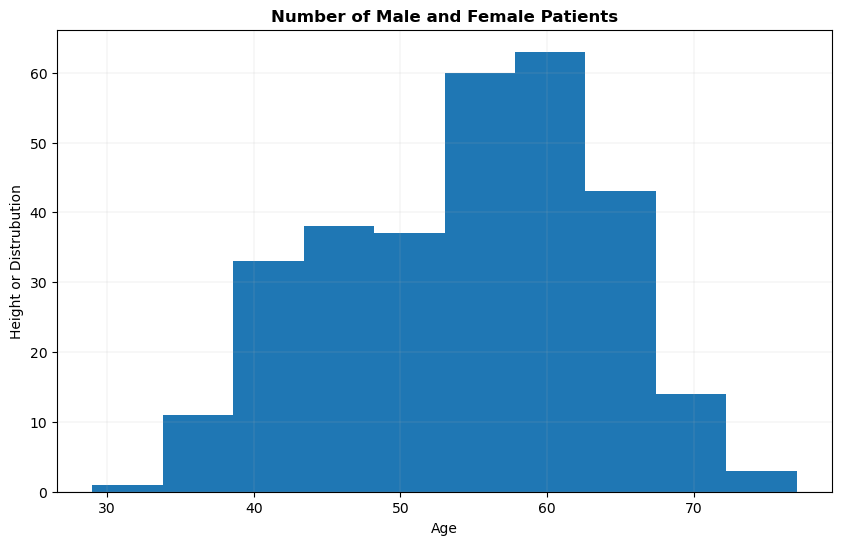

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['age'])
ax.grid(linewidth=0.2, alpha=0.7)
ax.set_xlabel('Age')
ax.set_ylabel('Height or Distrubution')
ax.set_title('Number of Male and Female Patients', fontweight='bold');

Most of the patient falls within the age 50's and 60's

In [8]:
# Number of Males and Female Patients

In [9]:
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# checking the number of individuals (males and females) patients
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
df['sex'].value_counts(normalize=True)

1    0.683168
0    0.316832
Name: sex, dtype: float64

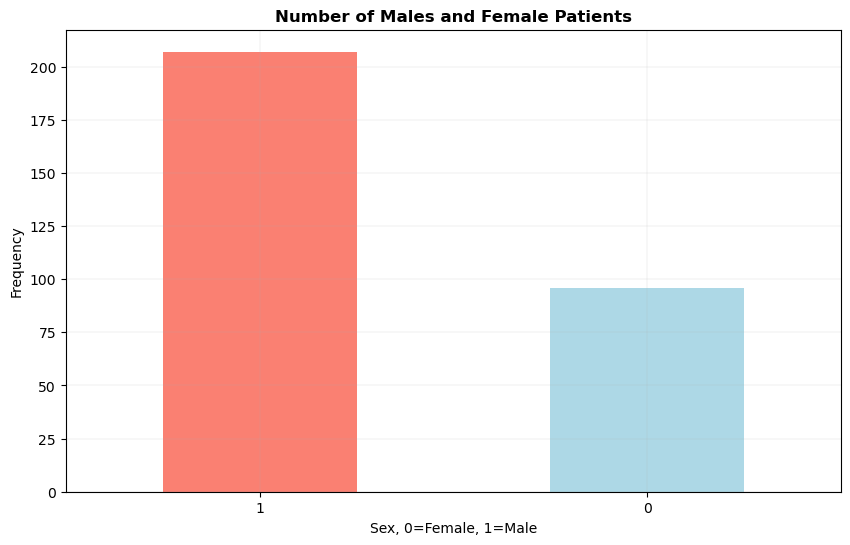

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
df['sex'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
ax.grid(linewidth=0.2, alpha=0.7)
ax.set_xlabel('Sex, 0=Female, 1=Male')
plt.xticks(rotation = 0)
ax.set_ylabel('Frequency')
ax.set_title('Number of Males and Female Patients', fontweight='bold');

Infering from the graph, I can say there are  about 68% of males and 32% females

In [13]:
#Number of Males and Females Having Heart Disease

In [14]:
pd.crosstab(index=df['sex'], 
            columns=df['target'],
            rownames=['age'], 
            colnames=['target'])

target,0,1
age,,
0,24,72
1,114,93


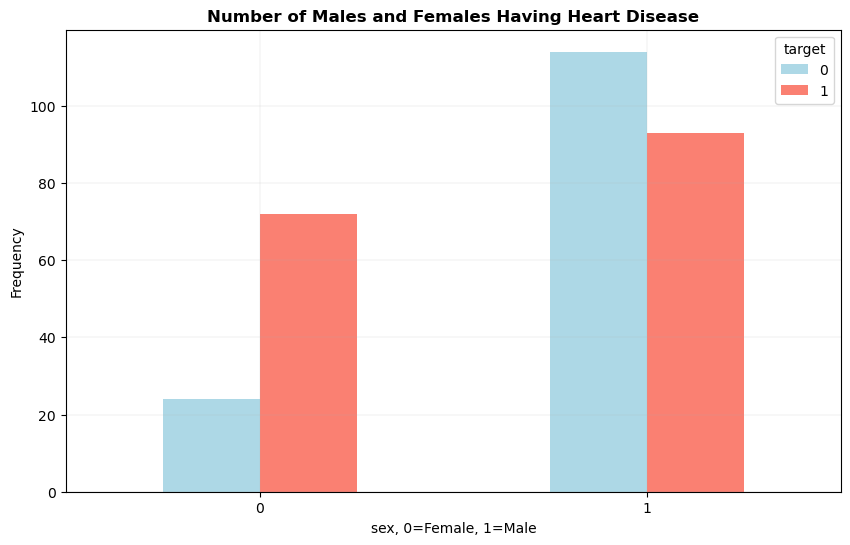

In [15]:
pd.crosstab(index=df['sex'], 
            columns=df['target'],
            rownames=['age'], 
            colnames=['target']).plot(kind='bar',figsize=(10, 6), color=['lightblue', 'salmon'])
plt.xlabel('sex, 0=Female, 1=Male')
plt.grid(linewidth=0.2, alpha=0.7)
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.title('Number of Males and Females Having Heart Disease', fontweight='bold');

Heart disease is a more common health problem in males than females. In this sample, 93 males have heart disease, compared to 72 females. However, heart disease is still a significant health problem for women. Even though the number of women with heart disease is lower than the number of men, there are still a significant number of women affected by this disease.

In [16]:
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Max Heart Rate vrs Heart Disease

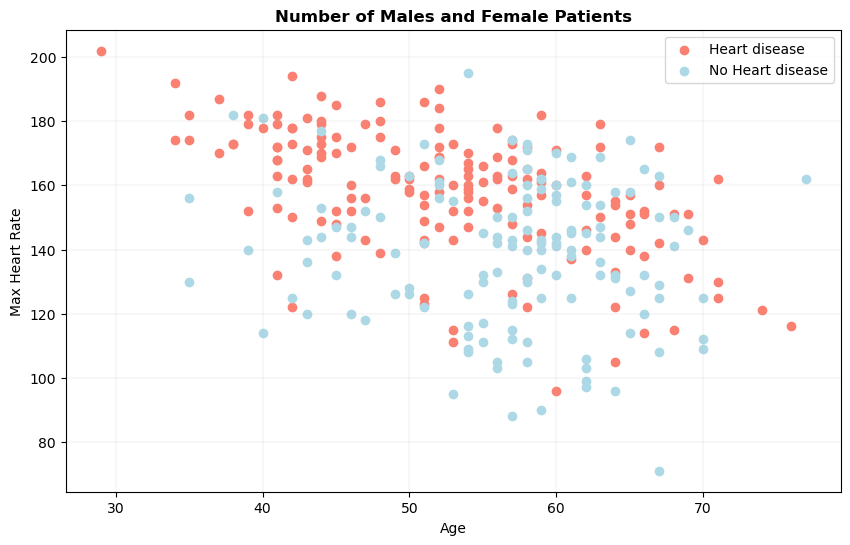

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

# people having max heart rate and also having heart disease
ax.scatter(df.age[df.target == 1],
           df.max_hr[df.target==1], 
           c="salmon", label='Heart disease')

# people not no having max heart rate also not having heart disease
ax.scatter(df.age[df.target == 0],
           df.max_hr[df.target== 0], 
           c="lightblue", label='No Heart disease')
ax.grid(linewidth=0.2, alpha=0.7)

ax.legend()

ax.set_xlabel('Age')
ax.set_ylabel('Max Heart Rate')
ax.set_title('Number of Males and Female Patients', fontweight='bold');

The maximum heart rate (MHR) is typically high between the ages of 30 and 65. People between the ages of 43 and 57 are more likely to have heart disease and a high MHR. As people age, their MHR tends to decrease.

* The maximum heart rate decreases with increasing age. This is because the heart muscle becomes less efficient at pumping blood as it ages.
* People between the ages of 43 and 57 are more likely to have heart disease and a high maximum heart rate. This is because the risk of heart disease increases with age.
* There is a correlation between maximum heart rate and heart disease. This means that people with a high maximum heart rate are more likely to develop heart disease.

In [19]:
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Checking for the chest pain type
df['chest_pain_type'].value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain_type, dtype: int64

In [21]:
df['chest_pain_type'].value_counts(normalize=True)

0    0.471947
2    0.287129
1    0.165017
3    0.075908
Name: chest_pain_type, dtype: float64

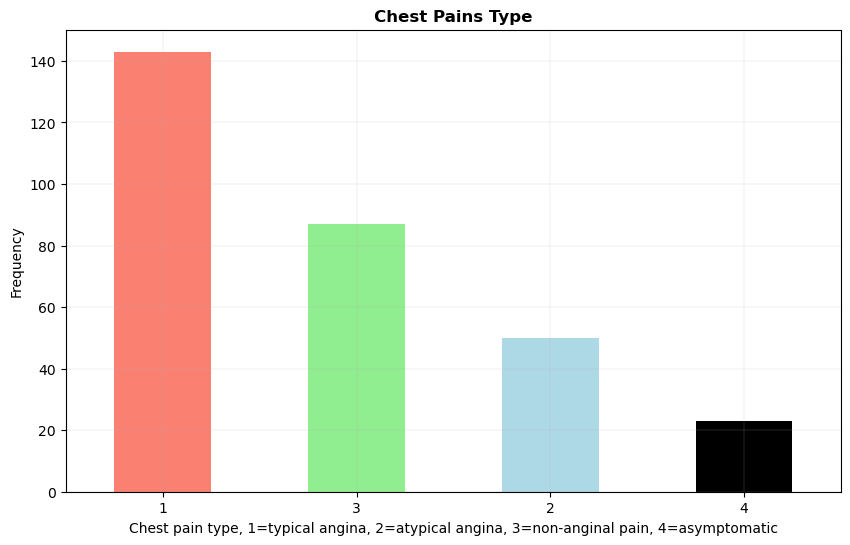

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
# Create a list of the new xtick values
xticks = [0, 1, 2, 3]
# Create a list of the new xtick labels
xticklabels = [1, 3, 2, 4]

df['chest_pain_type'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen', 'lightblue', 'black'])
ax.grid(linewidth=0.2, alpha=0.7)

# Set the xticks
ax.set_xticks(xticks, xticklabels)
plt.xticks(rotation=0)
ax.set_xlabel('Chest pain type, 1=typical angina, 2=atypical angina, 3=non-anginal pain, 4=asymptomatic')
ax.set_ylabel('Frequency')
ax.set_title('Chest Pains Type', fontweight='bold');

typical angina had about 48%, atypical angina had almost 17%, non-anginal pain had almost 29% and asymptomatic had almost 0.08%

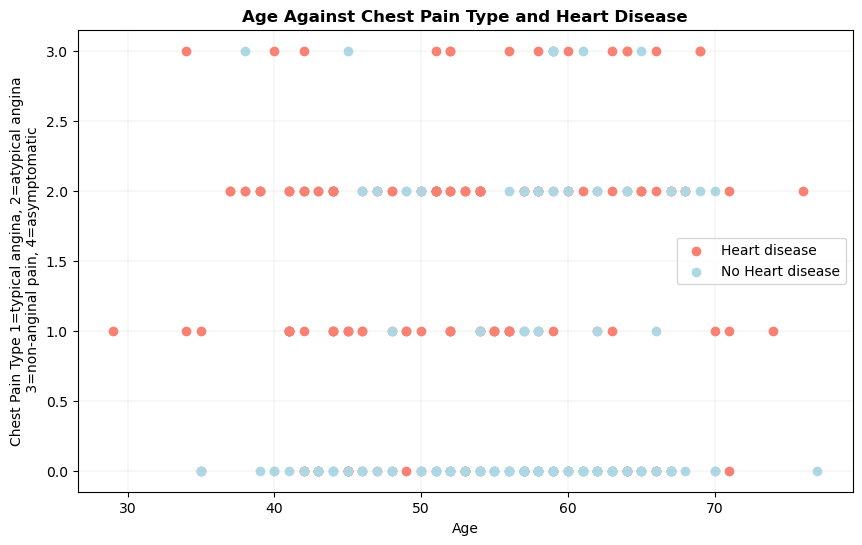

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

# chest pain type relating to having heart disease
ax.scatter(df.age[df.target==1],
          df.chest_pain_type[df.target==1], c="salmon", label='Heart disease')

# chest pain type relating to having no heart disease
ax.scatter(df.age[df.target==0],
          df.chest_pain_type[df.target==0], c="lightblue", label='No Heart disease')
ax.grid(linewidth=0.2, alpha=0.7)
ax.legend()
ax.set_xlabel('Age')
ax.set_ylabel('Chest Pain Type 1=typical angina, 2=atypical angina\n 3=non-anginal pain, 4=asymptomatic')
ax.set_title('Age Against Chest Pain Type and Heart Disease', fontweight='bold');

0 doesn't contribute to heart disease, 1, 2 and does contribute the most then 4 follows.

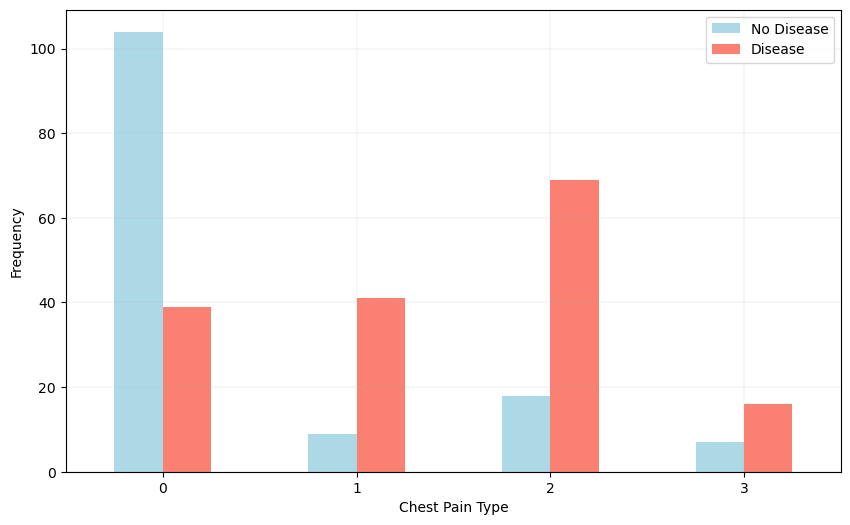

In [24]:
pd.crosstab(index=df['chest_pain_type'], 
            columns=df['target'],
            rownames=['age'], 
            colnames=['target']).plot(kind='bar',figsize=(10, 6), color=['lightblue', 'salmon'])
plt.xlabel('Chest Pain Type')
plt.grid(linewidth=0.2, alpha=0.7)
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(["No Disease", "Disease"])
ax.set_title('Chest Pain Type Contribution to Heart Disease', fontweight='bold');

In [25]:
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain_type,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_bp,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestoral,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_hr,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


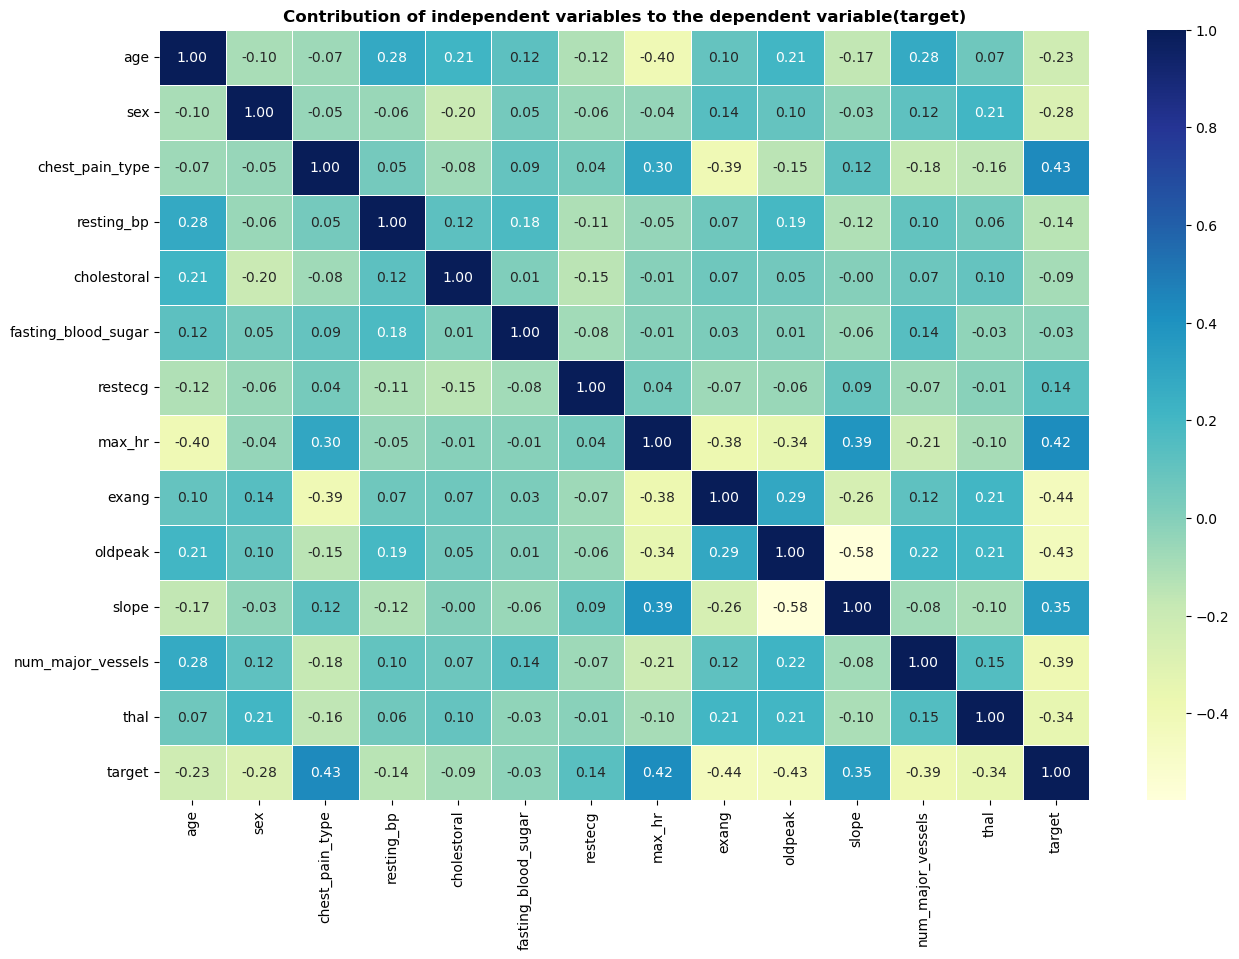

In [27]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu")
plt.title('Contribution of independent variables to the dependent variable(target)', fontweight='bold');

From the heatmap we can say that *chest_pain_type*, *max_heart* and *slope* do contribute to the predicting whether a patient is having heart disease or not. Resting electrocardiographic (Restecg) does contributr but not much.

## Enough of the EDA, let us build a model driven EDA

In [28]:
df

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## preparing the data ready for machine learning

In [29]:
# check if there are NaN values
df.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

In [30]:
# there are no NaN values so let's check if we have categorical values
df.dtypes

age                      int64
sex                      int64
chest_pain_type          int64
resting_bp               int64
cholestoral              int64
fasting_blood_sugar      int64
restecg                  int64
max_hr                   int64
exang                    int64
oldpeak                float64
slope                    int64
num_major_vessels        int64
thal                     int64
target                   int64
dtype: object

In [31]:
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
# Split the data into train and test sets
np.random.seed(2)
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [34]:
len(X_train), len(X_test), len(y_train), len(y_test)

(242, 61, 242, 61)

In [35]:
# Since there are no NaN and categorical values, it means the the data is preprared ready for machine learning.
# Let's start building model.

## Fit the model to data and make predictons

In [36]:
def fit_score_model(X_train, y_train, X_test, y_test):
    
    """
    Evaluates a set of machine learning models on a given dataset.
    
    Arg:
    X_train: The trainig data
    y_train: The training labels.
    X_test: The test data.
    y_test: The test labels.
    
    Returns:
    A dictionary mapping model names to their accuracies.
    
    """
    # Random seed for reproducible results
    np.random.seed(2)

    # instantiate model
    models = {
        'LinearSVC': LinearSVC(),
        'DecisionTree': DecisionTreeClassifier(),
        'KNN': KNeighborsClassifier(),
        'LinearModel': LinearRegression(),
        'RandomForest': RandomForestClassifier(),
     }

    # evaluate the model
    model_evaluation = {}
    model_evaluation_train = {}
    model_bb = {}
    for key, model in models.items():
        # Fit the model to the data the learn patterns
        model.fit(X_train, y_train)
        # make predictions
        y_preds = model.predict(X_test)
        # evaluate model
#         model_evaluation[key] = { f"default-score: {model.score(X_test, y_test)}", 
#                                  f"accuracy: {accuracy_score(y_test, y_preds)}",
#                                  f"precision: {precision_score(y_test, y_preds)}",
#                                 f"recall: {recall_score(y_test, y_preds)}",
#                                 f"f1: {f1_score(y_test, y_preds)}"}

        model_evaluation_train[key] = model.score(X_train, y_train)
        model_evaluation[key] = model.score(X_test, y_test)
    return {'training set': model_evaluation_train,
            '========': '====================',
            'testing set': model_evaluation}

In [37]:
baseline_model = fit_score_model(X_train, y_train, X_test, y_test)
baseline_model

/Users/nat/Desktop/main/machine-learning/heart-disease-project/heart-disease-env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'training set': {'LinearSVC': 0.7231404958677686,
  'DecisionTree': 1.0,
  'KNN': 0.7396694214876033,
  'LinearModel': 0.4918195855818297,
  'RandomForest': 1.0},
 '========': '====================',
 'testing set': {'LinearSVC': 0.8032786885245902,
  'DecisionTree': 0.8524590163934426,
  'KNN': 0.7049180327868853,
  'LinearModel': 0.5923159749481812,
  'RandomForest': 0.9016393442622951}}

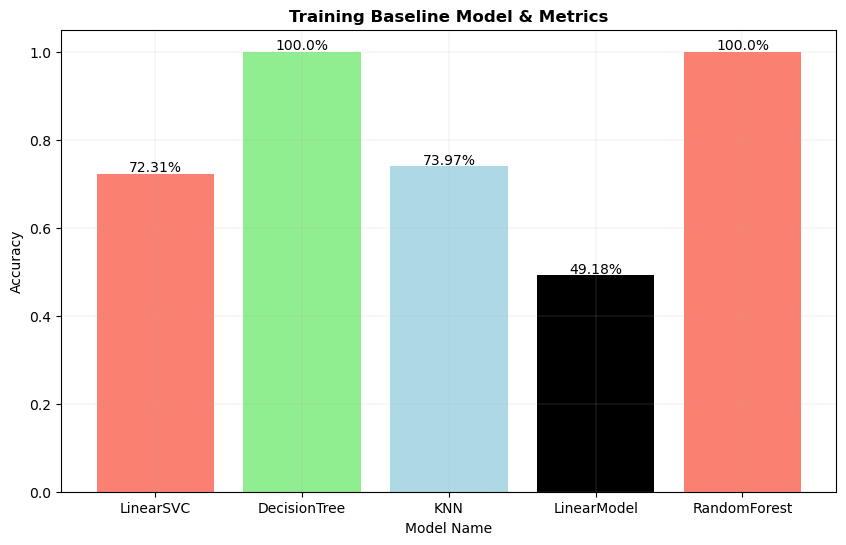

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
model_names = []; accuracies = []
for name, value in baseline_model['training set'].items():
    model_names.append(name); accuracies.append(value)
    # Create a list of colors
    colors = ['salmon', 'lightgreen', 'lightblue', 'black']
    
# Plot the data
ax.bar(model_names, accuracies, color=colors)
# Add the numbers on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy+0.03, f'{round(accuracy*100, 2)}%', ha='center', va='top')
    
# Add grid lines
ax.grid(linewidth=0.2, alpha=0.7)

ax.set_xlabel('Model Name')
ax.set_ylabel('Accuracy')
ax.set_title('Training Baseline Model & Metrics', fontweight='bold');

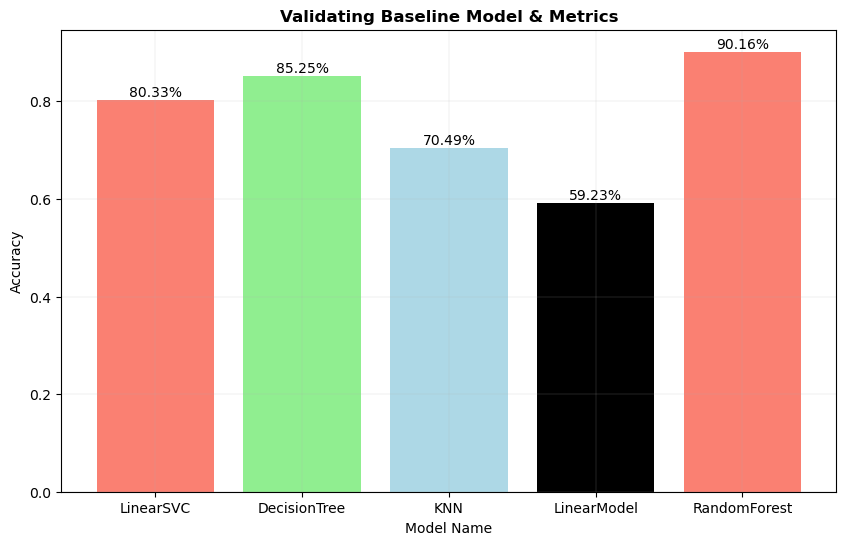

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
model_names = []; accuracies = []
for name, value in baseline_model['testing set'].items():
    model_names.append(name); accuracies.append(value)
    # Create a list of colors
    colors = ['salmon', 'lightgreen', 'lightblue', 'black']
    
# Plot the data
ax.bar(model_names, accuracies, color=colors)
# Add the numbers on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy+0.03, f'{round(accuracy*100, 2)}%', ha='center', va='top')
    
# Add grid lines
ax.grid(linewidth=0.2, alpha=0.7)

ax.set_xlabel('Model Name')
ax.set_ylabel('Accuracy')
ax.set_title('Validating Baseline Model & Metrics', fontweight='bold');

When the model score on training dataset performs poorly than model score testing dataset, it means that the model is overfitting the training data. Overfitting occurs when the model learns the training data too well, and as a result, it does not generalize well to new data. This can happen when the model is too complex, or when the training data is not large enough.

There are a few things you can do to prevent overfitting:

* Reduce the complexity of the model. This can be done by using a simpler model architecture, or by regularizing the model.
* Increase the size of the training data. This will help the model to learn more general patterns in the data, and as a result, it will be less likely to overfit.
* Use cross-validation. Cross-validation is a technique that can be used to evaluate the performance of a model on data that it has not seen before. This can help you to identify whether the model is overfitting the training data.

<hr>

According to the baseline model and metrics (results), RandomForest had the best performance on the validating sets, followed by Decision Tree, LinearSVC, K-Nearest Neighbors, and Linear Regression.

Since we do not have enough data, lets get rid of the LiearSVC, though it had the best score. Let's also remove K-Nearest Neighbors and Linear Regression from the model and improve the rest of the model to see if we can meet our target.

## Improving the model

In [40]:
def evaluate_predictions(y_true, y_pred):
    """
      Evaluates the predictions made by a model.

      Args:
        y_true: The ground truth labels.
        y_pred: The predicted labels.

      Returns:
        A dictionary containing the accuracy, precision, recall, and F1 score.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

## random forest model improvement

In [41]:
%%time
# Using RandomizedSearchCV to tune hyperparameters for random forest
np.random.seed(2)
param_dist = {
    'n_estimators': np.arange(10, 1500, 50),
    'max_features': ['sqrt', 'log2', None],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

# model
random_forest = RandomForestClassifier()

# tune hyperparameters
rs_random_forest = RandomizedSearchCV(estimator=random_forest,
                                      n_iter=20,
                                      param_distributions=param_dist,
                                      scoring='accuracy',
                                      cv=15, 
                                      verbose=2)

rs_random_forest.fit(X_train, y_train)

Fitting 15 folds for each of 20 candidates, totalling 300 fits
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1160; total time=   0.6s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1160; total time=   0.5s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1160; total time=   0.5s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1160; total time=   0.5s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1160; total time=   0.5s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1160; total time=   0.5s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1160; total time=   0.5s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1160; total time=   0.5s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators

[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=560; total time=   0.2s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=560; total time=   0.2s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=560; total time=   0.2s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=560; total time=   0.2s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=560; total time=   0.2s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=560; total time=   0.2s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=560; total time=   0.2s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=560; total time=   0.2s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=560; total time=   0.2s
[CV] END max_features=log2, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=760; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=760; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=760; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=760; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=760; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=760; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=760; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=760; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=760; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=410; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=410; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=410; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=410; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=410; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=410; total time=   0.2s
[CV] END max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=1260; total time=   0.5s
[CV] END max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=1260; total time=   0.5s
[CV] END max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=1260; total time=   0.5s
[CV] END max_features=log2, min_samples_lea

RandomizedSearchCV(cv=15, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': array([  10,   60,  110,  160,  210,  260,  310,  360,  410,  460,  510,
        560,  610,  660,  710,  760,  810,  860,  910,  960, 1010, 1060,
       1110, 1160, 1210, 1260, 1310, 1360, 1410, 1460])},
                   scoring='accuracy', verbose=2)

In [42]:
rs_random_forest.best_params_

{'n_estimators': 960,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'log2'}

In [49]:
rs_rf_preds = rs_random_forest.predict(X_test)
random_forest_improve = evaluate_predictions(y_test, rs_rf_preds)
random_forest_improve

Acc: 90.16%
Precision: 0.83
Recall: 1.00
F1 score: 0.91


{'accuracy': 0.9, 'precision': 0.83, 'recall': 1.0, 'f1': 0.91}

# decision tree model improvement

In [50]:
decision_tree = DecisionTreeClassifier()
decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [51]:
%%time
# Using RandomizedSearchCV to tune hyperparameters for random forest
np.random.seed(2)

param_dist1 = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': np.arange(1, 20, 2),
    'min_samples_split': np.arange(1, 90)
    
}

# tune hyperparameters
rs_decision_tree = RandomizedSearchCV(estimator=decision_tree,
                                      n_iter=20,
                                      param_distributions=param_dist1,
                                      cv=15, 
                                      verbose=2)

rs_decision_tree.fit(X_train, y_train)

Fitting 15 folds for each of 20 candidates, totalling 300 fits
[CV] END criterion=log_loss, max_depth=17, min_samples_split=84; total time=   0.0s
[CV] END criterion=log_loss, max_depth=17, min_samples_split=84; total time=   0.0s
[CV] END criterion=log_loss, max_depth=17, min_samples_split=84; total time=   0.0s
[CV] END criterion=log_loss, max_depth=17, min_samples_split=84; total time=   0.0s
[CV] END criterion=log_loss, max_depth=17, min_samples_split=84; total time=   0.0s
[CV] END criterion=log_loss, max_depth=17, min_samples_split=84; total time=   0.0s
[CV] END criterion=log_loss, max_depth=17, min_samples_split=84; total time=   0.0s
[CV] END criterion=log_loss, max_depth=17, min_samples_split=84; total time=   0.0s
[CV] END criterion=log_loss, max_depth=17, min_samples_split=84; total time=   0.0s
[CV] END criterion=log_loss, max_depth=17, min_samples_split=84; total time=   0.0s
[CV] END criterion=log_loss, max_depth=17, min_samples_split=84; total time=   0.0s
[CV] END crit

[CV] END criterion=log_loss, max_depth=19, min_samples_split=75; total time=   0.0s
[CV] END criterion=log_loss, max_depth=19, min_samples_split=75; total time=   0.0s
[CV] END criterion=log_loss, max_depth=19, min_samples_split=75; total time=   0.0s
[CV] END criterion=log_loss, max_depth=19, min_samples_split=75; total time=   0.0s
[CV] END criterion=log_loss, max_depth=19, min_samples_split=75; total time=   0.0s
[CV] END criterion=log_loss, max_depth=19, min_samples_split=75; total time=   0.0s
[CV] END criterion=log_loss, max_depth=19, min_samples_split=75; total time=   0.0s
[CV] END criterion=log_loss, max_depth=19, min_samples_split=75; total time=   0.0s
[CV] END criterion=log_loss, max_depth=19, min_samples_split=75; total time=   0.0s
[CV] END criterion=log_loss, max_depth=19, min_samples_split=75; total time=   0.0s
[CV] END criterion=log_loss, max_depth=19, min_samples_split=75; total time=   0.0s
[CV] END criterion=log_loss, max_depth=19, min_samples_split=75; total time=

RandomizedSearchCV(cv=15, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89])},
                   verbose=2)

In [52]:
rs_decision_tree.best_params_

{'min_samples_split': 23, 'max_depth': 17, 'criterion': 'log_loss'}

In [53]:
rs_dt_preds = rs_decision_tree.predict(X_test)
decision_tree_improve = evaluate_predictions(y_test, rs_dt_preds)
decision_tree_improve

Acc: 86.89%
Precision: 0.80
Recall: 0.97
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.8, 'recall': 0.97, 'f1': 0.88}

In [54]:
# Confusion Matrix plot

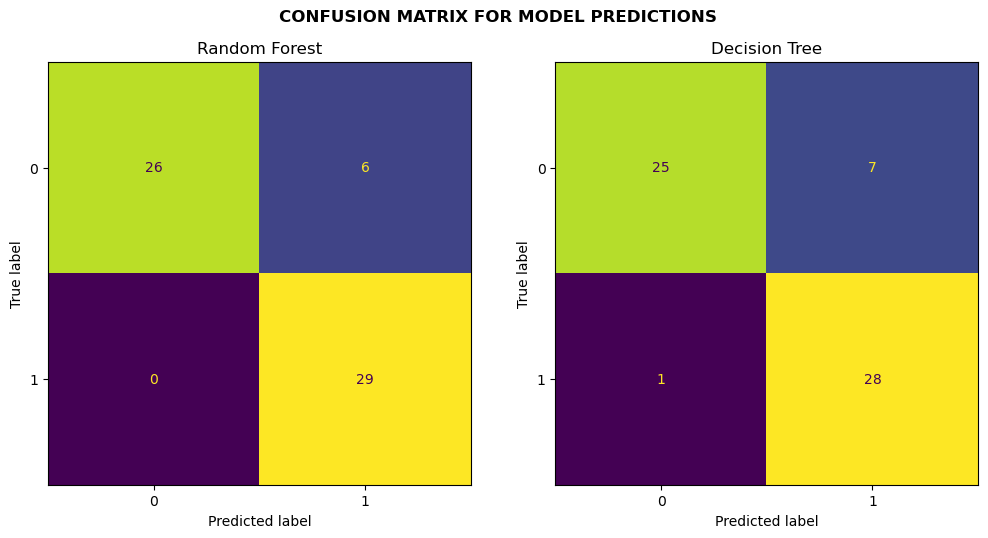

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 16))
ax = ax.flatten()

for i, v in enumerate(ax):
    if i == 0:
        ax[i].set_title('Random Forest')
        # Plot confusion matrix for RandomForest
        ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                                    y_pred=rs_rf_preds,
                                                    ax=ax[i], colorbar=False)
        
        
            
    if i == 1:
        ax[i].set_title('Decision Tree')
        # Plot confusion matrix for DecisionTree
        ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                                    y_pred=rs_dt_preds,
                                                    ax=ax[i], colorbar=False)
            
#     if i == 2:
#         ax[i].set_title('LinearSVC')
#         # Plot confusion matrix for LinearSVC
#         ConfusionMatrixDisplay.from_predictions(y_true=y_test,
#                                                     y_pred=rs_lsvc_preds,
#                                                     ax=ax[i], colorbar=False)
        
fig.suptitle('CONFUSION MATRIX FOR MODEL PREDICTIONS', y=0.66, fontweight='bold');


In [56]:
## putting the improved model together and plotting it and plotting (putting up a classification report)

In [57]:
data = [random_forest_improve, 
        decision_tree_improve]

results_df = pd.DataFrame(data, index=['RandomForest', 'DecisionTree'])
results_df

,accuracy,precision,recall,f1
RandomForest,0.90,0.83,1.00,0.91
DecisionTree,0.87,0.80,0.97,0.88


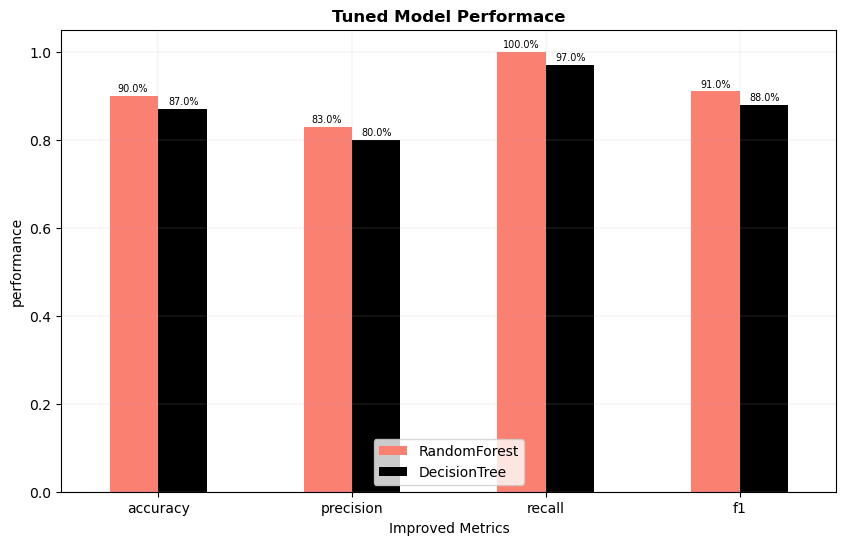

In [58]:
results_df.T.plot(kind='bar', 
                  figsize=(10, 6),
                  color=['salmon','black'])

plt.xlabel('Improved Metrics')
plt.grid(linewidth=0.2, alpha=0.7)
plt.xticks(rotation=0)
plt.ylabel('performance')
plt.legend(loc=8)
plt.title('Tuned Model Performace', fontweight='bold')

dicts = {
    'rotation': 'horizontal',
    'fontsize': 'x-small',
}

# Accuracy
plt.text(-0.21, 0.91, f"{results_df['accuracy'].values[0]*100:.1f}%", fontdict=dicts)
plt.text(0.05, 0.88, f"{results_df['accuracy'].values[1]*100:.1f}%", fontdict=dicts)

# precision
plt.text(0.79, 0.84, f"{results_df['precision'].values[0]*100:.1f}%", fontdict=dicts)
plt.text(1.05, 0.81, f"{results_df['precision'].values[1]*100:.1f}%", fontdict=dicts)


# recall
plt.text(1.78, 1.01, f"{results_df['recall'].values[0]*100:.1f}%", fontdict=dicts)
plt.text(2.05, 0.98, f"{results_df['recall'].values[1]*100:.1f}%", fontdict=dicts)


# f1
plt.text(2.8, 0.92, f"{results_df['f1'].values[0]*100:.1f}%", fontdict=dicts)
plt.text(3.05, 0.89, f"{results_df['f1'].values[1]*100:.1f}%", fontdict=dicts);

After applying RandomizedSearchCV to fine-tune the models, it was observed that the RandomForest model did not show any improvement, maintaining its accuracy at 90.16%. On the other hand, the DecisionTree model exhibited a slight improvement, increasing from 85.25% to 86.89% accuracy. In general, the Random model performed the best, although after multiple hyperparameter tuning attempts, it achieved the same score as the baseline model. Notably, the models demonstrated high precision, recall, and F1-scores.

Considering the balanced distribution of classes in the dataset, I will prioritize accuracy. The RandomForest model achieved an accuracy of 90.16%, while the DecisionTree model achieved an accuracy of 86.89%.

## Feature Importance

In [59]:
rs_random_forest.best_params_

{'n_estimators': 960,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'log2'}

In [60]:
ideal_model = RandomForestClassifier(n_estimators=960,
                                     min_samples_split=4,
                                     min_samples_leaf=2,
                                     max_features='log2')
ideal_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 960,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [61]:
ideal_model.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=960)

In [62]:
ideal_model.feature_importances_

array([0.08049144, 0.03673181, 0.13461857, 0.06433571, 0.06808345,
       0.00741569, 0.02090388, 0.12261463, 0.06787794, 0.12040955,
       0.05381143, 0.11662083, 0.10608506])

In [63]:
# Match features to columns
features_dict = dict(zip(df.columns, list(ideal_model.feature_importances_)))
features_dict

{'age': 0.08049143897690986,
 'sex': 0.036731808977515525,
 'chest_pain_type': 0.1346185698726506,
 'resting_bp': 0.0643357107348961,
 'cholestoral': 0.06808345267273821,
 'fasting_blood_sugar': 0.007415688748462617,
 'restecg': 0.020903881618023222,
 'max_hr': 0.12261463093035865,
 'exang': 0.06787793737427342,
 'oldpeak': 0.12040955252711902,
 'slope': 0.0538114297640517,
 'num_major_vessels': 0.11662083397050488,
 'thal': 0.10608506383249627}

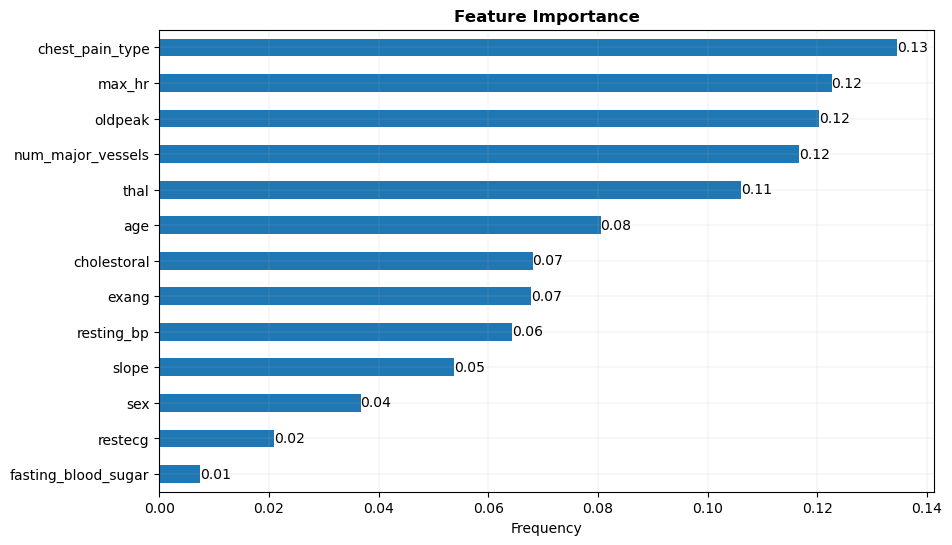

In [69]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
# features_df.T.plot.bar(title="Feature Importance", legend=False);
# Sort the DataFrame by values in ascending order
sorted_df = features_df.T.sort_values(by=0, ascending=True)

# Plot the sorted DataFrame
ax = sorted_df.plot(kind='barh', figsize=(10, 6), legend=False)

# Add text annotations for each bar
for i, v in enumerate(sorted_df[0]):
#     ax.text(v, i, str(v), ha='left', va='center')
    ax.text(v, i, f"{v:.2f}", ha='left', va='center')
    

plt.xlabel('Frequency')
plt.title('Feature Importance', fontweight='bold')
plt.grid(linewidth=0.2, alpha=0.7)

In [68]:
features_dict

AttributeError: 'dict' object has no attribute 'T'